
<img src="./flu-vaccine.jpg" alt="box office Image" style="width:11500px;height:400px;">


# PREDICTING INDIVIDUAL LIKELIHOOD OF H1N1 "SWINE FLU" VACCINATION.



**Author:** Njiru Logan Kimathi
***

## Overview

***

This project predicts how likely individuals are to recieve H1N1 vaccines based on their backgrounds, opinions and health behaviours related to their personal vacination patterns.

## Business Understanding

***

**HealthFirst Alliance** is a non-governmental organization (NGO) dedicated to improving global public health by promoting vaccination awareness, combating vaccine hesitancy, and guiding data-driven policy decisions to enhance community health outcomes. The organization collaborates with local governments, healthcare providers, and community leaders to design and implement programs that increase vaccination rates and reduce the impact of preventable diseases.

## Data Understanding

***
The [data](https://www.drivendata.org/competitions/66/flu-shot-learning/page/210/) used for this project comes from the United States Department of Health and Human Services(DHHS), [National Centre for Health Statistics](https://www.cdc.gov/nchs/index.htm).

It was collected from The National 2009 H1N1 Flu phone Survey, where respondents were asked whether they had received the H1N1 "swine flu" and seasonal flu vaccines, in conjunction with questions about themselves. These additional questions covered their social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission.

The dataset contains **35 features** which can be generalized into **health and medical features, demographic and socioeconomic features, behavioral and opinion features, household and regional factors**.

For example:
* **h1n1_concern** - Level of concern about the H1N1 flu.
* **h1n1_knowledge** - Level of knowledge about H1N1 flu.
* **doctor_recc_h1n1** - H1N1 flu vaccine was recommended by doctor
* **opinion_h1n1_sick_from_vacc** - Respondent's worry of getting sick from taking H1N1 vaccine.
* **chronic_med_condition** - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness.
* **doctor_recc_seasonal** - Seasonal flu vaccine was recommended by doctor.

It has 50,000+ records where each row in the dataset represents **one person** who responded to the survey.

## DATA PREPARATION AND ANALYSIS

***
Let's take a deeper look at the data.
I'll start by importing the necessary data science libraries and opening the files into a dataframe called **vaccines**.


In [35]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import CustomFunctions as function

%matplotlib inline

In [36]:
vaccines_test = pd.read_csv("dataset\\training_set_features.csv", index_col="respondent_id")
vaccines_test.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [37]:
vaccines_test.tail()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


The dataset appears to be even from top to bottom. All records have the same number of features. However, this portion is missing the labels, Let's add them to it.

In [38]:
labels = pd.read_csv("dataset\\training_set_labels.csv", index_col="respondent_id")
labels.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [39]:
#joining both dataframes along the columns
vaccines = pd.concat([vaccines_test,labels], axis=1)

Next, a summary of the combined dataset.

In [40]:
#summary and shape of the columns
print(vaccines.shape)
vaccines.info()

(26707, 37)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  heal

This portion of the dataset has 26,707 records and a number of features have missing values. Let's take a closer look at these null values in terms of percentages.

In [41]:
# function to calculate null percentages
function.missing_percentage(vaccines)

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

Features like **employment_industry** and **employment_occupation** have 50% null values.

In [42]:
#displaying the values in employment industry
vaccines.employment_industry.value_counts()[0:5]

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
Name: employment_industry, dtype: int64

In [43]:
#displaying the values in employment occupation
vaccines.employment_occupation.value_counts()[0:5]

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
Name: employment_occupation, dtype: int64

Their values are not immediately understandable and might not be very relevant to this study. So I will drop the columns.


In [44]:
#dropping both columns
vaccines.drop(["employment_occupation","employment_industry"], inplace=True, axis=1)

**health_insurance** column has 46% null values. It is defined as explaining whether the respondent has health insurance or not. The values 0 = No and 1 = Yes.

In [45]:
#displaying the values in health insurance
vaccines.health_insurance.value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

Let's look at the relationship between this feature and some other **demographic and socioeconomic features** in the dataset.

In [46]:
#dataframe slice showing the health insurance null values and other socieconomic features
vaccines[vaccines["health_insurance"].isnull()][["employment_status","income_poverty","age_group","health_insurance"]]

,employment_status,income_poverty,age_group,health_insurance
respondent_id,,,,
2,Employed,"<= $75,000, Above Poverty",18 - 34 Years,NaN
3,Not in Labor Force,Below Poverty,65+ Years,NaN
4,Employed,"<= $75,000, Above Poverty",45 - 54 Years,NaN
5,Employed,"<= $75,000, Above Poverty",65+ Years,NaN
6,Employed,"<= $75,000, Above Poverty",55 - 64 Years,NaN
...,...,...,...,...
26695,Employed,"> $75,000",18 - 34 Years,NaN
26698,Employed,"> $75,000",35 - 44 Years,NaN
26700,Not in Labor Force,"> $75,000",55 - 64 Years,NaN


There seems to be an interesting correlation between individuals whose **income_poverty level is >=$75,000** and the null values. Let's investigate this further.

In [47]:
#datframe slice with health insurance null values and income poverty >= $75,000
vaccines[
    vaccines["health_insurance"].isnull() &
    vaccines["income_poverty"].isin(["> $75,000", "<= $75,000, Above Poverty"])
]

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,atmpeygn,"MSA, Principle City",2.0,3.0,0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,0,0
8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,bhuqouqj,"MSA, Not Principle City",1.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26694,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",0.0,0.0,0,1
26695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"> $75,000",Not Married,Rent,Employed,lrircsnp,"MSA, Principle City",0.0,0.0,0,0
26698,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,atmpeygn,"MSA, Not Principle City",1.0,1.0,0,1


These individuals make up 70% of the null values.  
From further domain knowledge, individuals above the poverty level are generally more likely to have access to health insurance, either through employment or private purchase.
The null values may represent a group that is more likely to have health insurance but did not explicitly report it.

For that I will impute the missing values for these records with the likely value of 1.

In [48]:
# Fill missing values with 1 for those specific records 
vaccines.loc[
    (vaccines["health_insurance"].isnull()) & 
    (vaccines["income_poverty"].isin(["> $75,000", "<= $75,000, Above Poverty"])),
    "health_insurance"
] = vaccines["health_insurance"].fillna(1)


**income_poverty** has 16% nulls so let's take a look at its values. It is described as explaining the household annual income of respondent with respect to 2008 Census poverty thresholds.

In [49]:
#displaying the values in income_poverty feature
vaccines.income_poverty.value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_poverty, dtype: int64

Given it is a categorical variable, I will impute the nulls with the mode value.

In [50]:
#imputing the missing values
vaccines.income_poverty.fillna("<= $75,000, Above Poverty", inplace=True)

Let's take another look at the percentage nulls.

In [51]:
function.missing_percentage(vaccines)

h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               14.206013
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race                            0.000000
sex             

Given the few nulls left in the dataset, I can drop the remaining records without risking loosing a lot of data.

In [52]:
#droppping the remaining nulls in the entire dataset
vaccines = vaccines.dropna()
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19975 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 19975 non-null  float64
 1   h1n1_knowledge               19975 non-null  float64
 2   behavioral_antiviral_meds    19975 non-null  float64
 3   behavioral_avoidance         19975 non-null  float64
 4   behavioral_face_mask         19975 non-null  float64
 5   behavioral_wash_hands        19975 non-null  float64
 6   behavioral_large_gatherings  19975 non-null  float64
 7   behavioral_outside_home      19975 non-null  float64
 8   behavioral_touch_face        19975 non-null  float64
 9   doctor_recc_h1n1             19975 non-null  float64
 10  doctor_recc_seasonal         19975 non-null  float64
 11  chronic_med_condition        19975 non-null  float64
 12  child_under_6_months         19975 non-null  float64
 13  health_worker   

### DATA ANALYSIS
***

Let's conduct some exploratory data analysis to explaore some of the relationships between the features in our data.

The target variable for this project will be **h1n1_vaccine** - **Whether respondent received H1N1 flu vaccine**. Let's analyze the distribution of the target.

It has binary values where 0=No; 1=Yes.

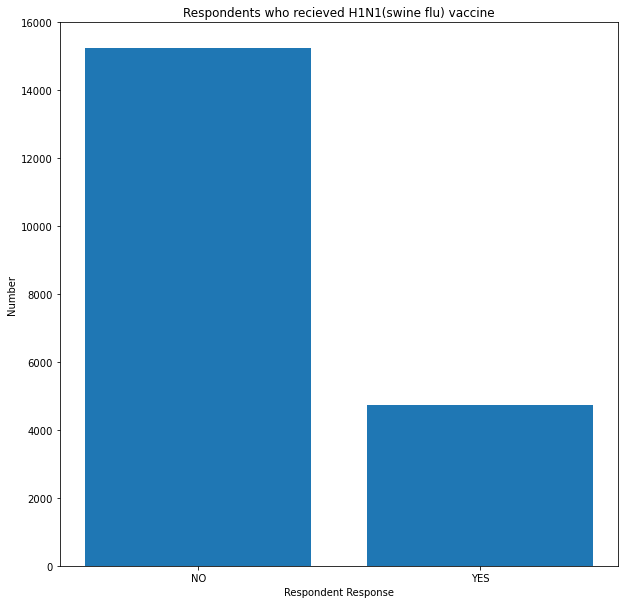


Class Percentages:
 0    76.325407
1    23.674593
Name: h1n1_vaccine, dtype: float64


In [53]:
# Count the occurrences of each class
H1N1_counts = vaccines["h1n1_vaccine"].value_counts()

#plot the graph
fig, ax = plt.subplots(figsize = (10,10))

ax.bar(H1N1_counts.index,H1N1_counts.values )
ax.set_title("Respondents who recieved H1N1(swine flu) vaccine")
ax.set_xlabel("Respondent Response")
ax.set_ylabel("Number")
ax.set_xticks([0,1])
ax.set_xticklabels(["NO","YES"])
plt.show()
# Calculate the percentage of each class
class_percentages = vaccines["h1n1_vaccine"].value_counts(normalize=True) * 100
print("\nClass Percentages:\n", class_percentages)

A majority of the respondents appear to not have recieved the H1N1 vaccination shots. Only 24% recieved the vaccination as compared to 76% who did not.

What about the seasonal flu vaccination?

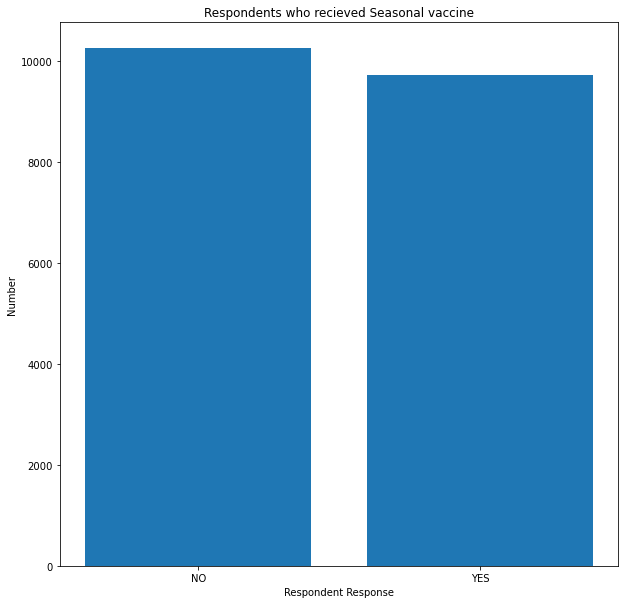


Class Percentages:
 0    51.324155
1    48.675845
Name: seasonal_vaccine, dtype: float64


In [54]:
# Count the occurrences of each class
seasonal_counts = vaccines["seasonal_vaccine"].value_counts()

#plot the graph
fig, ax = plt.subplots(figsize = (10,10))

ax.bar(seasonal_counts.index,seasonal_counts.values )
ax.set_title("Respondents who recieved Seasonal vaccine")
ax.set_xlabel("Respondent Response")
ax.set_ylabel("Number")
ax.set_xticks([0,1])
ax.set_xticklabels(["NO","YES"])
plt.show()
# Calculate the percentage of each class
class_percentages = vaccines["seasonal_vaccine"].value_counts(normalize=True) * 100
print("\nClass Percentages:\n", class_percentages)

Interesting. For this one, the resposes were balanced and almost equal.

Next, let's analyze the distribution of the categories across the **demographic and socioeconomic features**.

In [55]:
categorical_cols = ['age_group', 'education', 'income_poverty', 'marital_status', 'sex']
function.analyze_categorical(vaccines, categorical_cols)


Value counts for age_group:

65+ Years        4826
55 - 64 Years    4328
45 - 54 Years    4066
18 - 34 Years    3836
35 - 44 Years    2919
Name: age_group, dtype: int64

Value counts for education:

College Graduate    8401
Some College        5688
12 Years            4349
< 12 Years          1537
Name: education, dtype: int64

Value counts for income_poverty:

<= $75,000, Above Poverty    12401
> $75,000                     6159
Below Poverty                 1415
Name: income_poverty, dtype: int64

Value counts for marital_status:

Married        11090
Not Married     8885
Name: marital_status, dtype: int64

Value counts for sex:

Female    11836
Male       8139
Name: sex, dtype: int64


The distribution of the categories across most of these features appears to be balanced which is good. There are no significant imbalances.

Let's visualize the distribution.

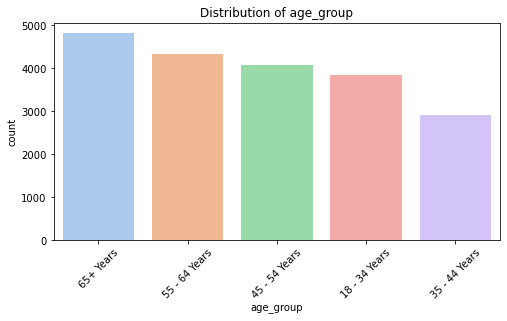

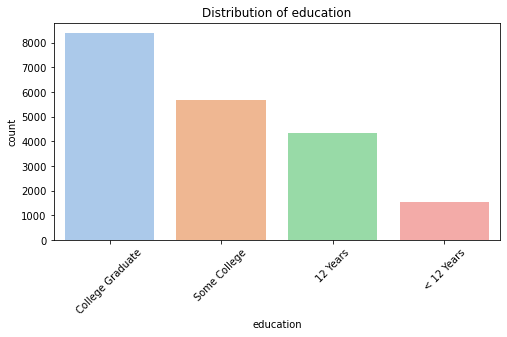

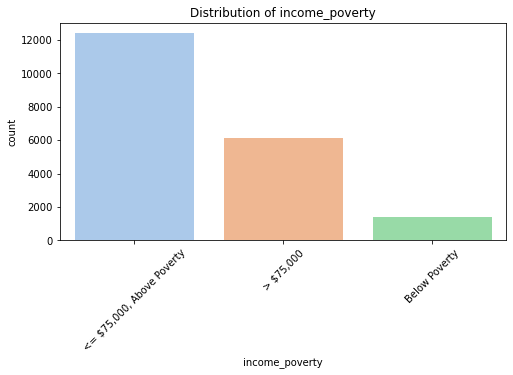

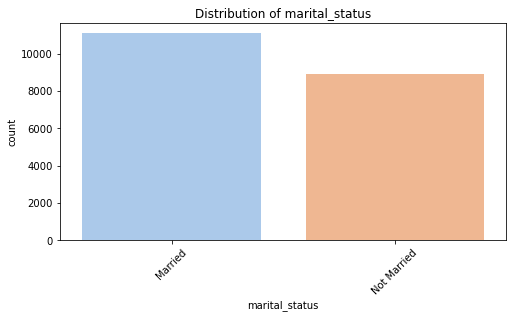

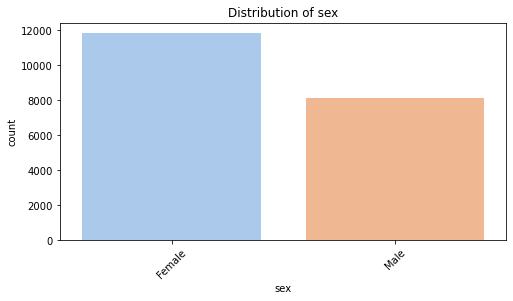

In [56]:
# plot bar charts for categorical features
function.plot_categorical(vaccines,categorical_cols)

For **Age Group**, majority of the respondents are 65+ years old (4,826 individuals) while the least represented group is 35 - 44 Years (2,919 individuals).
Older individuals might have higher vaccination rates due to higher health risks.

For **Education**, higher education levels might correlate with increased vaccine awareness as the number of respondents increased with increase in education levels.

For **Income_Poverty levels**, the majority of the respondents are **above poverty** earning upto $75,000.

For **Sex**, the number of female respondents was higher than that of male respondents. 11,836 as to 8139.

**Married Individuals** also gave more responses than **single individuals**. This might be due to increased family responsibilities which might potentially influence vaccination rates.

Next, let's explore some of the numerical features.

In [57]:
# summary statistics for numerical columns
numerical_cols = ['h1n1_concern', 'h1n1_knowledge', 'household_adults', 'household_children']
function.analyze_numerical(vaccines, numerical_cols)

       h1n1_concern  h1n1_knowledge  household_adults  household_children
count  19975.000000    19975.000000      19975.000000        19975.000000
mean       1.595344        1.305131          0.902028            0.524055
std        0.886809        0.596594          0.746182            0.916407
min        0.000000        0.000000          0.000000            0.000000
25%        1.000000        1.000000          0.000000            0.000000
50%        2.000000        1.000000          1.000000            0.000000
75%        2.000000        2.000000          1.000000            1.000000
max        3.000000        2.000000          3.000000            3.000000


**h1n1_concern** feature describes the *level of concern about the H1N1 flu of the respondent*. The values in the feature represent [0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned]

*Mean:* 1.59 indicates that, on average, respondents are **somewhat concerned** about H1N1 flu.
*Quartiles:* 25% and 75% values suggest most respondents are **between "Not very concerned" (1) and "Very concerned" (2)**.

Indicating that a significant portion of the population is **moderately or highly concerned** about H1N1, potentially indicating a readiness to accept preventive measures like vaccination.

**h1n1_knowledge** feature describes the *level of knowledge about H1N1 flu.* The values in the feature represent [0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.]

*Mean:* 1.31 indicates that respondents generally have **"A little knowledge"** about H1N1 flu.
*Quartiles:* Median knowledge level is 1 ("A little knowledge").

From this more can be done to educate the public about H1N1 flu.

**household_children** feature describes the *number of children in household, top-coded to 3.*

*Mean:* 0.52 indicates that many households have no children or just one child.  
*Quartiles:* Half of the households have no children.

Households with children might be **more inclined** to vaccinate.

Here is a visual of the same data.

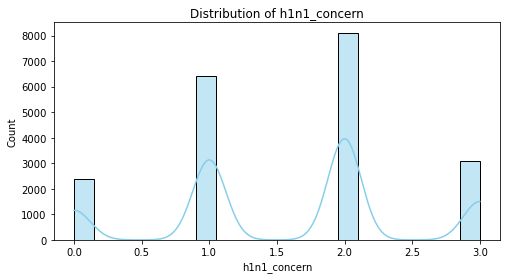

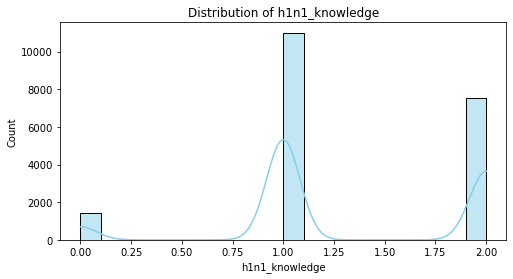

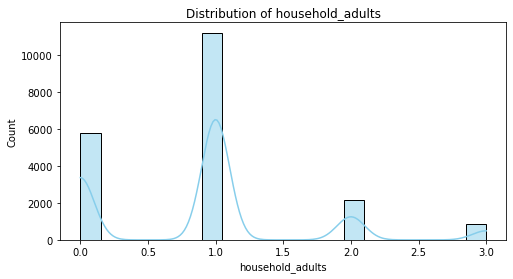

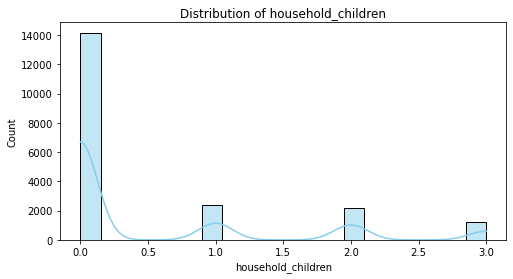

In [58]:
# plot histograms for numerical features
function.plot_histograms(vaccines, numerical_cols)

Great, the histograms collaborate with what has been noted above from the summary stats.

Let's try to spot any **outliers** in our data.

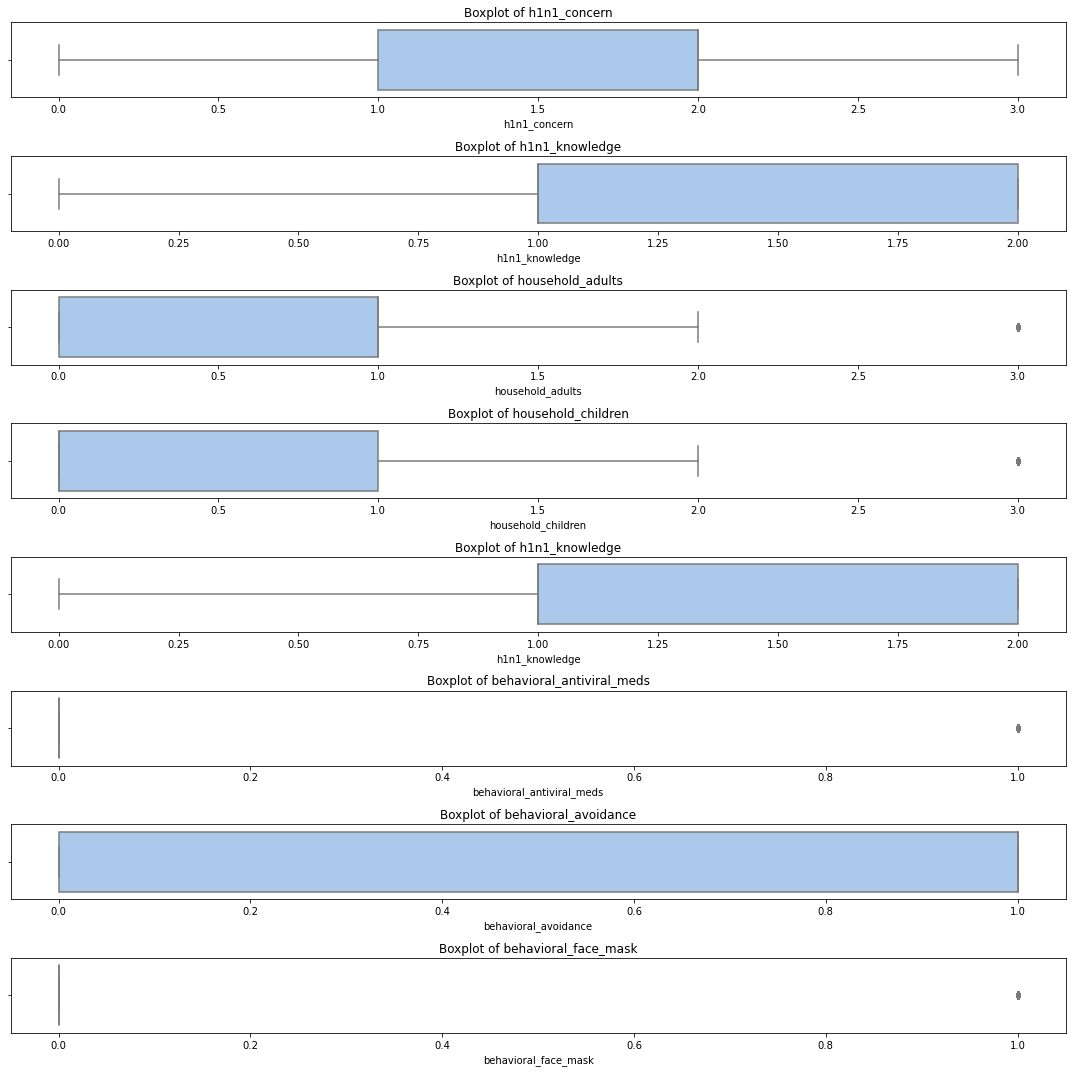

In [59]:
numerical_cols_2 = ['h1n1_concern','h1n1_knowledge','household_adults','household_children',"h1n1_knowledge",              
"behavioral_antiviral_meds",  
"behavioral_avoidance",        
"behavioral_face_mask",        
"behavioral_wash_hands",       
"behavioral_large_gatherings",  
"behavioral_outside_home",     
"behavioral_touch_face",      
"doctor_recc_h1n1",             
"doctor_recc_seasonal",        
"chronic_med_condition",       
"child_under_6_months",        
"health_worker",              
"health_insurance",            
"opinion_h1n1_vacc_effective", 
"opinion_h1n1_risk",            
"opinion_h1n1_sick_from_vacc",  
"opinion_seas_vacc_effective", 
"opinion_seas_risk",            
"opinion_seas_sick_from_vacc" 
]
function.plot_boxplots(vaccines,numerical_cols_2)

Quite a relief to see that there are no significant outliers. This is due to the fact that while most of the features are "categorical" in nature, meaning that even though their data types are floating point or integers, the values themselves are more of categories than continuous values.

**Binary Features.**   

A lot of the features in the dataset are made up of binary values: 0=No and 1=Yes. I'm exited to explore more about the distribution of these binary values in these features!

In [60]:
#Analyze the proportions of "Yes" and "No" (1 and 0) values in binary features.
binary_cols = ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 
                   'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 
                   'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 
                   'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance']

function.analyze_binary(vaccines,binary_cols)


Proportions for behavioral_antiviral_meds:

0.0    95.284105
1.0     4.715895
Name: behavioral_antiviral_meds, dtype: float64

Proportions for behavioral_avoidance:

1.0    73.687109
0.0    26.312891
Name: behavioral_avoidance, dtype: float64

Proportions for behavioral_face_mask:

0.0    93.466834
1.0     6.533166
Name: behavioral_face_mask, dtype: float64

Proportions for behavioral_wash_hands:

1.0    83.058824
0.0    16.941176
Name: behavioral_wash_hands, dtype: float64

Proportions for behavioral_large_gatherings:

0.0    65.506884
1.0    34.493116
Name: behavioral_large_gatherings, dtype: float64

Proportions for behavioral_outside_home:

0.0    67.849812
1.0    32.150188
Name: behavioral_outside_home, dtype: float64

Proportions for behavioral_touch_face:

1.0    68.340426
0.0    31.659574
Name: behavioral_touch_face, dtype: float64

Proportions for doctor_recc_h1n1:

0.0    77.35169
1.0    22.64831
Name: doctor_recc_h1n1, dtype: float64

Proportions for doctor_recc_seasonal:



**Behavioral**

*Behavioral Antiviral Meds*

Only 4.7% of respondents use antiviral medications, indicating a low adoption rate.

*Behavioral Avoidance*

A significant 73.7% practice avoidance behaviors to prevent flu spread, showing widespread concern and proactive measures.

*Behavioral Face Mask*

Only 6.5% use face masks, suggesting a potential area for improvement.

*Behavioral Wash Hands*

High adoption (83.1%) of handwashing indicates a strong awareness of this basic preventive measure.

*Behavioral Large Gatherings*

34.5% have reduced time at large gatherings, indicating moderate adherence to social distancing.

*Behavioral Outside Home*

32.2% restrict outdoor activities, suggesting majority still engage in outdoor activities despite flu concerns.

*Behavioral Touch Face*

68.3% touch their faces frequently, a behavior that could increase infection risk.

**Doctor Recommendations**

*Doctor Recommendation for H1N1 Vaccine*

Only 22.6% report receiving a recommendation for the H1N1 vaccine, suggesting potential gaps in healthcare communication.

*Doctor Recommendation for Seasonal Flu Vaccine*

33.7% receive recommendations for the seasonal flu vaccine, higher than H1N1 but still leaving room for improvement.

**Health-Related**

*Chronic Medical Condition*

28.3% of respondents report chronic medical conditions, indicating a substantial at-risk group for severe flu outcomes.

*Child Under 6 Months*

Only 8.2% have a child under 6 months in the household, a critical group for targeted flu prevention.

*Health Worker*

11.9% of respondents are health workers, who are crucial for vaccine advocacy and flu prevention.

*Health Insurance*

A high 92.3% of respondents report having health insurance, suggesting good access to healthcare services.


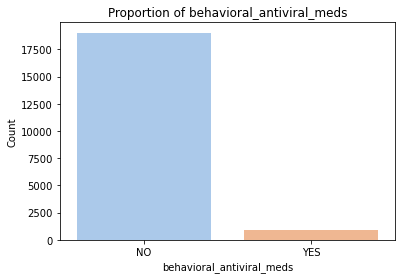

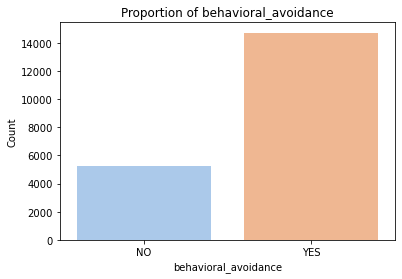

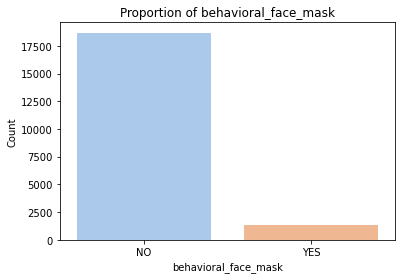

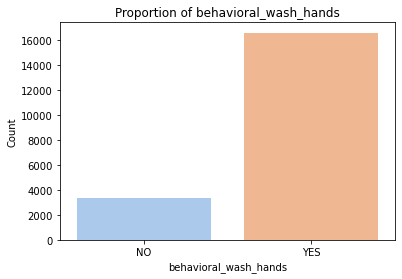

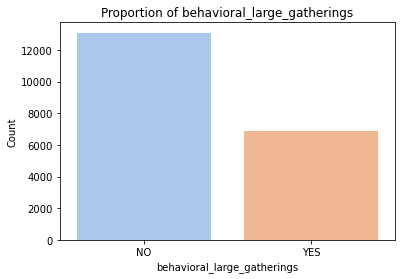

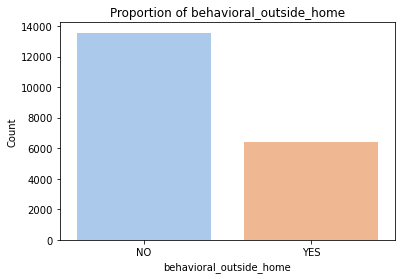

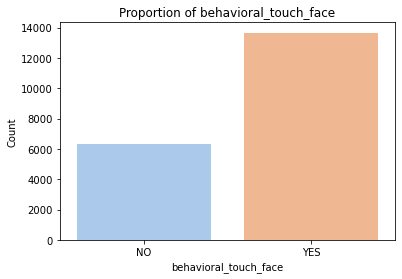

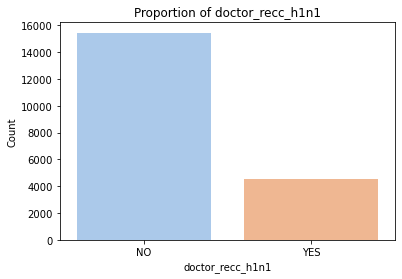

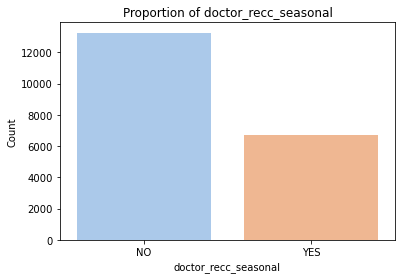

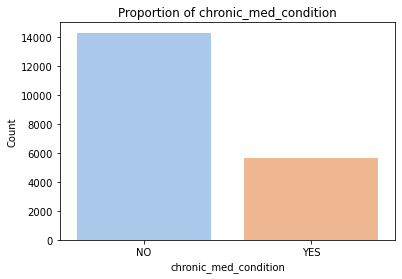

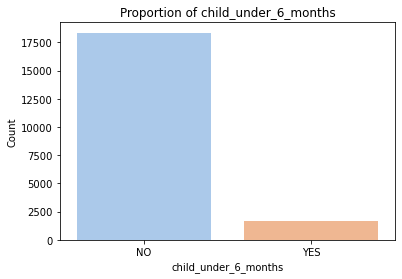

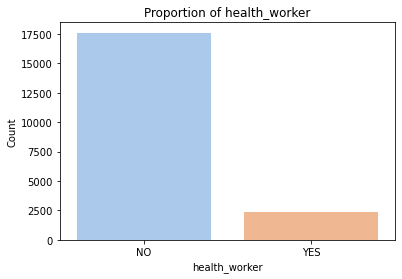

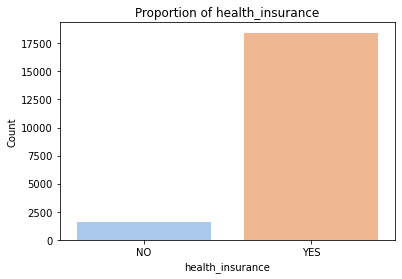

In [61]:
#plot countplots for the binary features
function.plot_binary(vaccines,binary_cols)

The numbers from the count plots clearly support the percentages discussed above.

**Opinion features.**

A lot of the features are also opinion-based ordinal features. Meaning they have an inherent order ranging from "Not at all effective" to "Very effective". e.g.  Respondent's opinion about H1N1 vaccine effectiveness, opinion about risk of getting sick with H1N1 flu without vaccine, opinion about worry of getting sick from taking H1N1 vaccine e.t.c. 
Let's examine the distributions of these opnions for different topics.

In [62]:
#display the value counts for these opinion features
opinion_cols = ['opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc',
                    'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc']
function.analyze_opinion(vaccines,opinion_cols)


Value counts for opinion_h1n1_vacc_effective:

4.0    9307
5.0    5777
3.0    2927
2.0    1375
1.0     589
Name: opinion_h1n1_vacc_effective, dtype: int64

Value counts for opinion_h1n1_risk:

2.0    7835
1.0    6113
4.0    4178
5.0    1270
3.0     579
Name: opinion_h1n1_risk, dtype: int64

Value counts for opinion_h1n1_sick_from_vacc:

2.0    7078
1.0    6912
4.0    4425
5.0    1504
3.0      56
Name: opinion_h1n1_sick_from_vacc, dtype: int64

Value counts for opinion_seas_vacc_effective:

4.0    9069
5.0    7733
2.0    1637
1.0     831
3.0     705
Name: opinion_seas_vacc_effective, dtype: int64

Value counts for opinion_seas_risk:

2.0    6952
4.0    6054
1.0    4384
5.0    2235
3.0     350
Name: opinion_seas_risk, dtype: int64

Value counts for opinion_seas_sick_from_vacc:

1.0    9239
2.0    5824
4.0    3703
5.0    1174
3.0      35
Name: opinion_seas_sick_from_vacc, dtype: int64


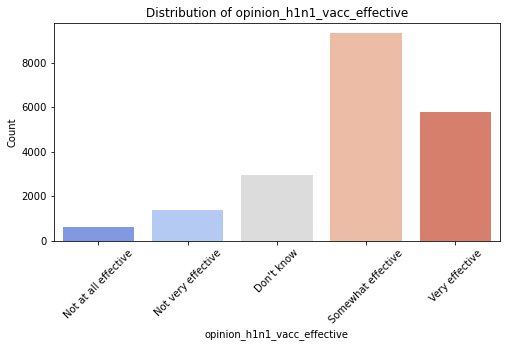

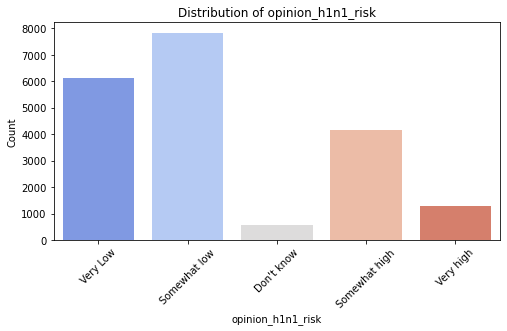

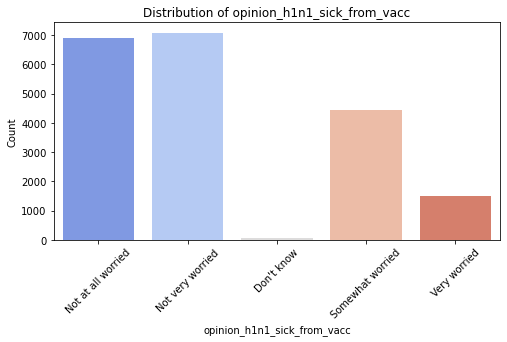

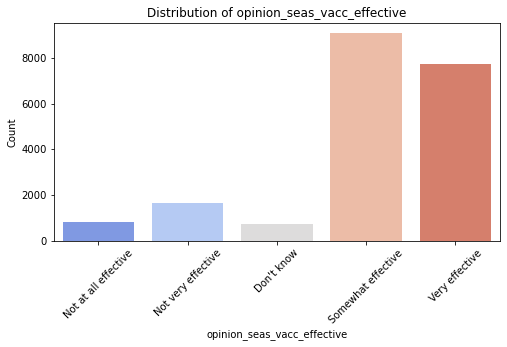

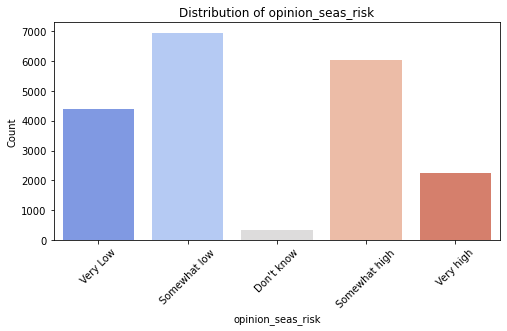

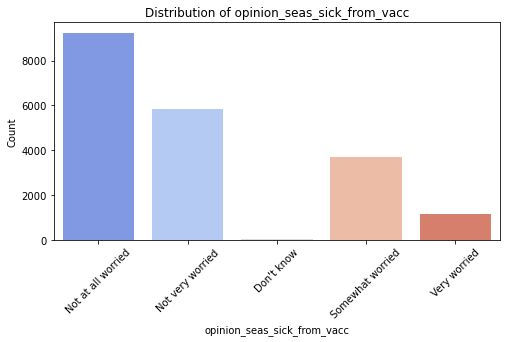

In [63]:
#plot the distribution of the value counts
opinion_value_labels = {
    "opinion_h1n1_vacc_effective": {
        1: "Not at all effective",
        2: "Not very effective",
        3: "Don't know",
        4: "Somewhat effective",
        5: "Very effective"
    },
    "opinion_h1n1_risk": {
        1: "Very Low",
        2: "Somewhat low",
        3: "Don't know",
        4: "Somewhat high",
        5: "Very high"
    },
    "opinion_h1n1_sick_from_vacc": {
        1: "Not at all worried",
        2: "Not very worried",
        3: "Don't know",
        4: "Somewhat worried",
        5: "Very worried"
    },
    "opinion_seas_vacc_effective": {
        1: "Not at all effective",
        2: "Not very effective",
        3: "Don't know",
        4: "Somewhat effective",
        5: "Very effective"
    },
    "opinion_seas_risk": {
        1: "Very Low",
        2: "Somewhat low",
        3: "Don't know",
        4: "Somewhat high",
        5: "Very high"
    },
    "opinion_seas_sick_from_vacc": {
        1: "Not at all worried",
        2: "Not very worried",
        3: "Don't know",
        4: "Somewhat worried",
        5: "Very worried"
    }
}

function.plot_opinion(vaccines,opinion_cols,opinion_value_labels)

There are some key insights from these plots.

**Opinions About H1N1 Vaccine**

*H1N1 Vaccine Effectiveness:*
Most respondents believe the H1N1 vaccine is effective, with the highest scores (4.0 and 5.0) accounting for ~75% of responses.

*H1N1 Risk Perception:*

Mixed opinions:
2.0 (Moderate Risk) is the most frequent response (~39%).
1.0 (Low Risk) is the second most frequent (~31%).
A smaller group perceives a high risk (4.0 and 5.0).

*H1N1 Vaccine Safety (Sick from Vaccination):*

The majority of responses are 1.0 and 2.0 (Low Concern), indicating most believe the vaccine is safe.
However, some respondents (4.0 and 5.0) perceive a significant risk of sickness.

**Opinions About Seasonal Flu Vaccine**

*Seasonal Vaccine Effectiveness:*

Strong agreement on the effectiveness, with 4.0 and 5.0 accounting for ~85% of responses.

*Seasonal Flu Risk Perception:*

2.0 (Moderate Risk) and 4.0 (High Risk) are the most common responses, indicating higher risk awareness than for H1N1.

*Seasonal Vaccine Safety (Sick from Vaccination):*

Most respondents perceive the vaccine as safe, with 1.0 (No Concern) accounting for ~46%.


Now using, **"h1n1_vaccine" - Whether respondent received H1N1 flu vaccine**, feature as our main target, let us conduct some bivariate analysis to explore the relationships between other variables and our target. This is crucial for understanding patterns and associations in the survey data.  

Lets get to exploring!

In [64]:
#assign the target variable
target_feature = vaccines["h1n1_vaccine"]

In [65]:
#analyze the relationship between the target and some categorical features
function.analyze_target_vs_categorical(vaccines, 'h1n1_vaccine', categorical_cols)


Relationship between h1n1_vaccine and age_group:

h1n1_vaccine          0         1
age_group                        
18 - 34 Years  0.791971  0.208029
35 - 44 Years  0.779719  0.220281
45 - 54 Years  0.787752  0.212248
55 - 64 Years  0.726895  0.273105
65+ Years      0.742437  0.257563

Relationship between h1n1_vaccine and education:

h1n1_vaccine             0         1
education                           
12 Years          0.793056  0.206944
< 12 Years        0.808718  0.191282
College Graduate  0.732651  0.267349
Some College      0.773383  0.226617

Relationship between h1n1_vaccine and income_poverty:

h1n1_vaccine                      0         1
income_poverty                               
<= $75,000, Above Poverty  0.779050  0.220950
> $75,000                  0.733885  0.266115
Below Poverty              0.752650  0.247350

Relationship between h1n1_vaccine and marital_status:

h1n1_vaccine           0         1
marital_status                    
Married         0.745446  

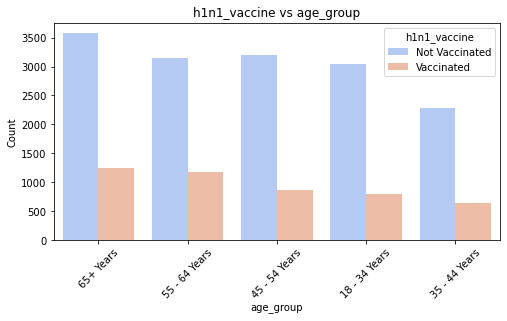

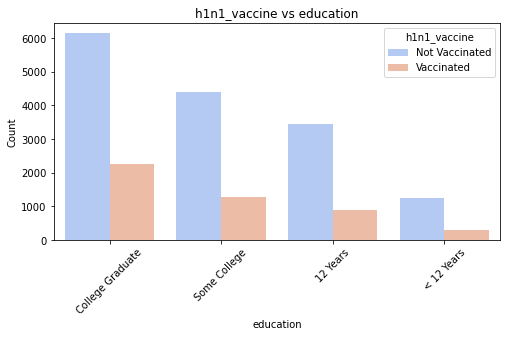

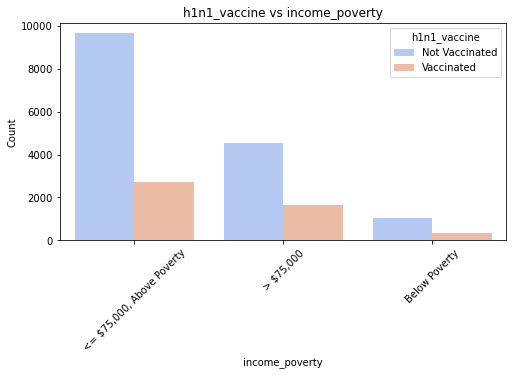

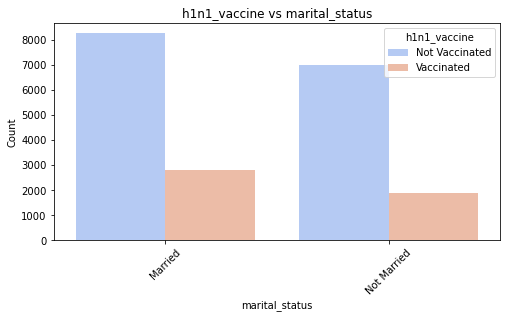

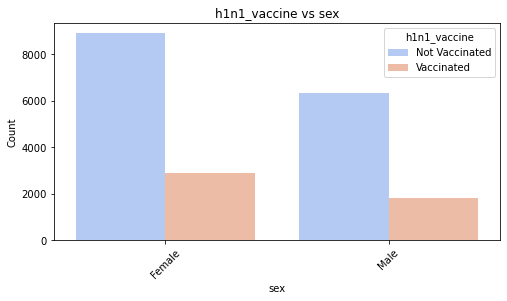

In [66]:
# Visualize target vs categorical features
function.plot_target_vs_categorical(vaccines, "h1n1_vaccine", categorical_cols)

**Age Group vs H1N1 Vaccine**:
*Older age groups* (55-64 years and 65+ years) have higher vaccination rates (~27% and ~26%, respectively).
*Younger age groups* (18-34 years and 35-44 years) show lower vaccination rates (~21% and ~22%, respectively).

Older individuals may have a higher perceived risk or concern about the flu.

**Education vs H1N1 Vaccine**:
*College graduates* have the highest vaccination rate (~27%), followed by individuals with some college education (~23%).
Those with *less than 12 years* of education are the least likely to get vaccinated (~19%).

Like seen before, higher education levels may correlate with better health awareness and access to healthcare resources.

**Income Poverty vs H1N1 Vaccine**:
*Higher income groups* (> $75,000) show the highest vaccination rate (~27%), followed by the middle-income group (<= $75,000, Above Poverty, ~22%).
Those *below poverty level* have a slightly lower vaccination rate (~25%).

Income levels may influence access to vaccination or healthcare resources.

**Marital Status vs H1N1 Vaccine**:
*Married individuals* have a higher vaccination rate (~25%) compared to *non-married individuals* (~21%).

Married individuals may prioritize family health, leading to higher vaccination rates against swine flu.

**Sex vs H1N1 Vaccine**:
*Females* are more likely to be vaccinated (~25%) than *males* (~22%).

Women may be more proactive in seeking preventive healthcare measures.


In [67]:
#analyze target vs numerical features
function.analyze_target_vs_numerical(vaccines,"h1n1_vaccine" ,numerical_cols)


Summary statistics for h1n1_concern by h1n1_vaccine:

                count      mean       std  min  25%  50%  75%  max
h1n1_vaccine                                                      
0             15246.0  1.524269  0.882560  0.0  1.0  2.0  2.0  3.0
1              4729.0  1.824487  0.861412  0.0  1.0  2.0  2.0  3.0

Summary statistics for h1n1_knowledge by h1n1_vaccine:

                count     mean       std  min  25%  50%  75%  max
h1n1_vaccine                                                     
0             15246.0  1.26466  0.593454  0.0  1.0  1.0  2.0  2.0
1              4729.0  1.43561  0.587994  0.0  1.0  1.0  2.0  2.0

Summary statistics for household_adults by h1n1_vaccine:

                count      mean       std  min  25%  50%  75%  max
h1n1_vaccine                                                      
0             15246.0  0.899777  0.754167  0.0  0.0  1.0  1.0  3.0
1              4729.0  0.909283  0.719866  0.0  0.0  1.0  1.0  3.0

Summary statistics for house

**H1N1 Concern**:
*Non-vaccinated* mean concern level: 1.52
*Vaccinated mean* concern level: 1.82.

Those who were vaccinated had a higher average level of concern about H1N1. This indicates that perceived severity may drive vaccine uptake.

**H1N1 Knowledge**:
*Non-vaccinated* mean knowledge level: 1.26
*Vaccinated* mean knowledge level: 1.43

Individuals with more knowledge about H1N1 were more likely to get vaccinated. This suggests that educational campaigns can be crucial for increasing vaccination rates.

Earlier on we analysed the univariate distribution of behavioral tendencies across different features. Let's now see how these behaviors were directly related with H1N1 vaccine uptake.

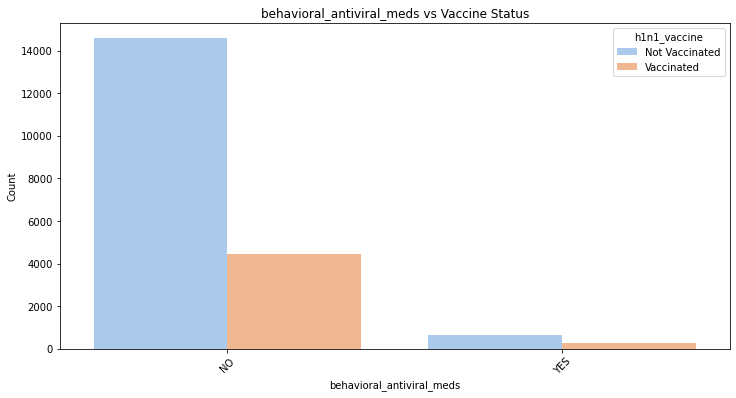

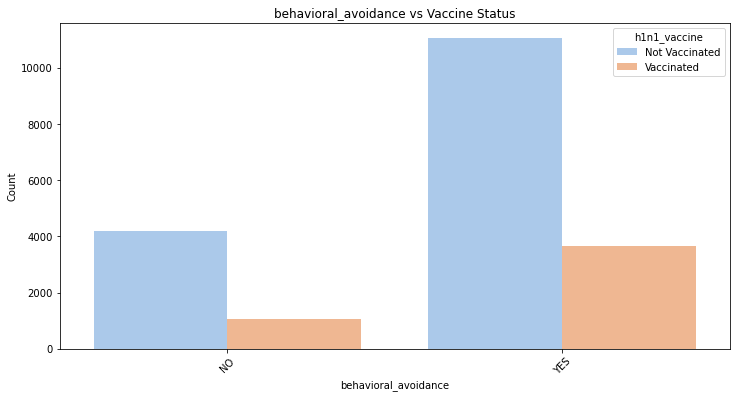

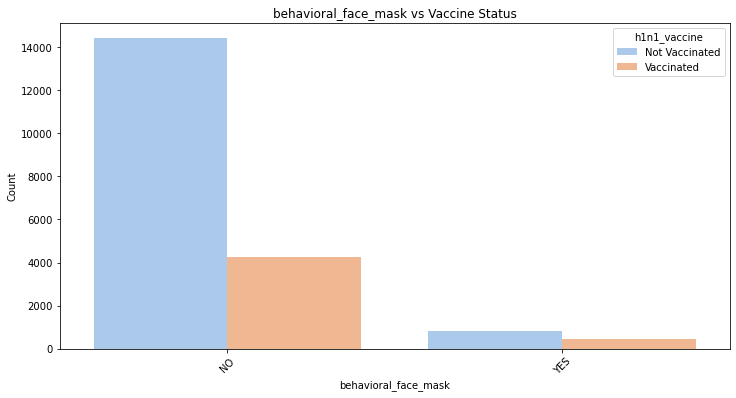

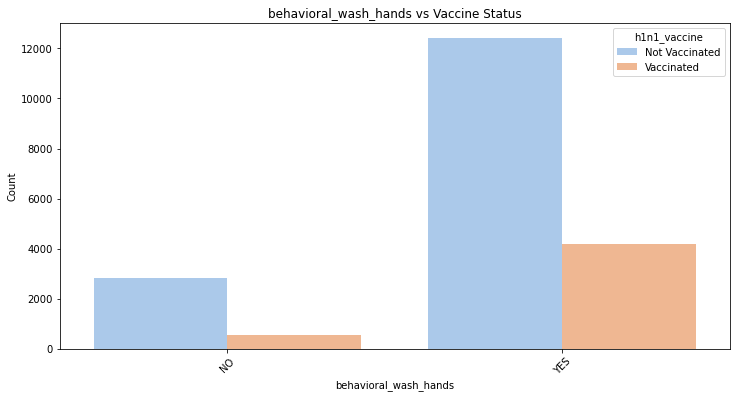

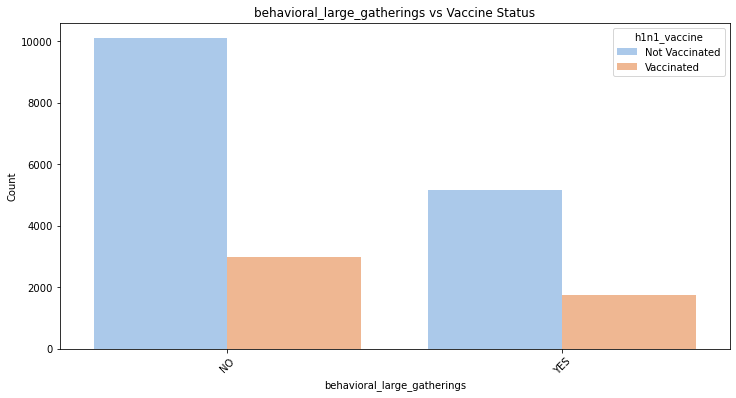

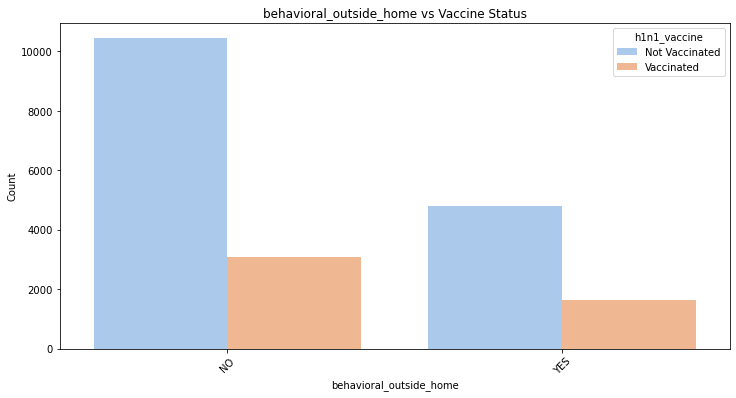

In [68]:
# respondent's behaviors vs swine flu vaccine uptake
behavioural_cols = [ "behavioral_antiviral_meds","behavioral_avoidance","behavioral_face_mask","behavioral_wash_hands","behavioral_large_gatherings","behavioral_outside_home"]
function.plot_behavioral_vs_vaccine(vaccines, "h1n1_vaccine", behavioural_cols )

Most of those vaccinated **did not use antiviral medications**.This is not surprising given only 4.7% of the respondents use antiviral medications.

Majority of those vaccinated **practied avoidance behaviors with people with flu like symptoms**, indicating a level of caution.

Most of those vaccinated also **practiced handwashing**.

There was a **slight differrence** between the number of vaccinated people who **reduced contact with people outside of their own households**. Same case for people who **reduced time spent at large gatherings**.

Intersting results!

Let's take adeeper dive into how respondents opinions affected theor H1N1 vaccine uptake.

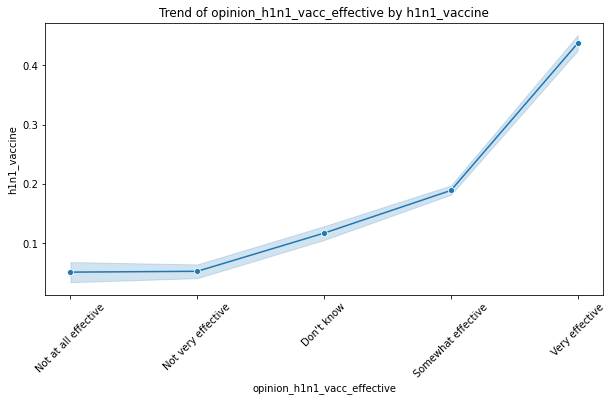

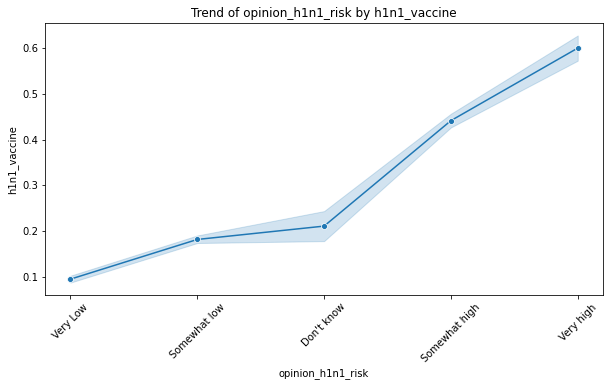

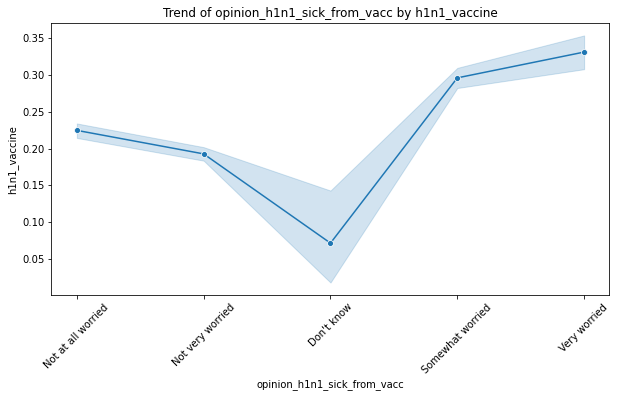

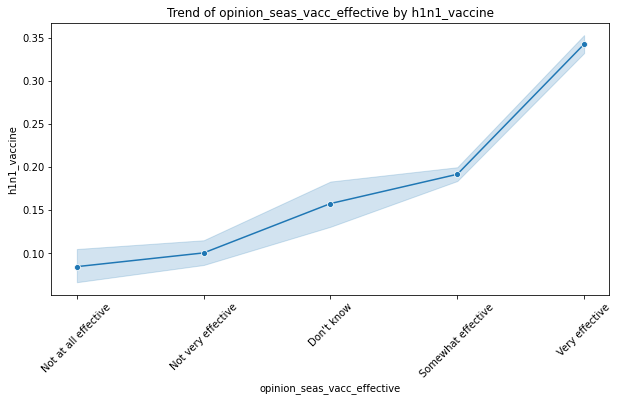

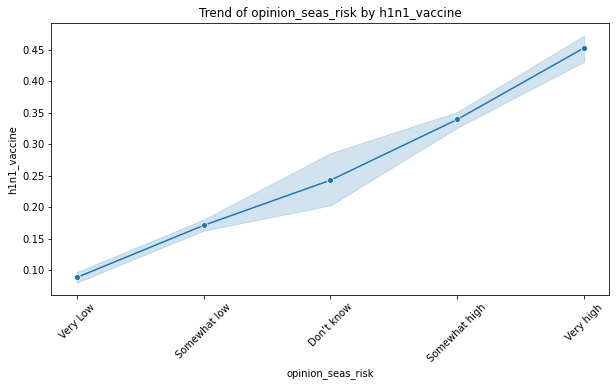

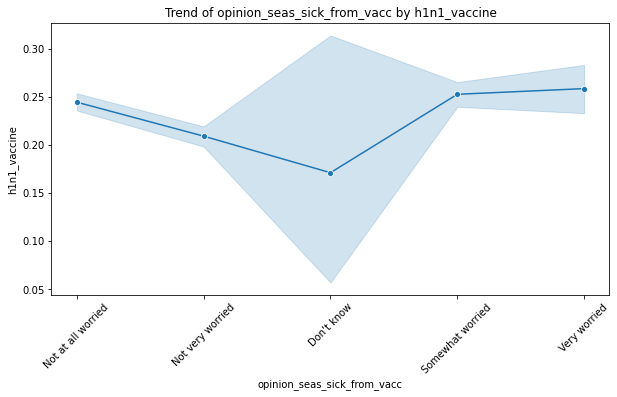

In [69]:
function.plot_opinion_vs_vaccine(vaccines,"h1n1_vaccine",opinion_cols,opinion_value_labels)

KeyError: 'seasonal_vaccine'

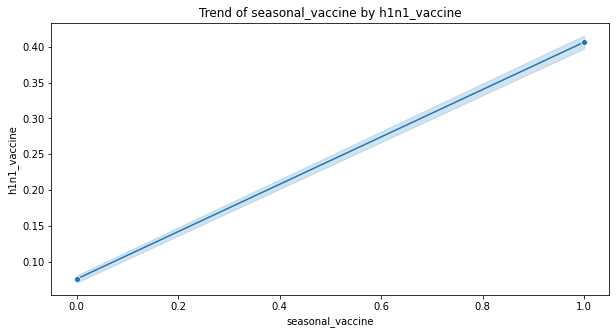

In [70]:
function.plot_opinion_vs_vaccine(vaccines,"h1n1_vaccine",["seasonal_vaccine"],opinion_value_labels)

Unsurprisingly, vaccination uptake increased with believe in the effectiveness of the H1N1 vaccine and seasonal flu vaccines.

Oddly, it had a inversely proportional relationship with beleives in risks associated with both vaccines.

There was however a strong relationship between those who took the H1N1 vaccine and those who took the Seasonal flu vaccine.




Next. let's explore whether health related aspects had any influence on the swine flu vaccine uptake.

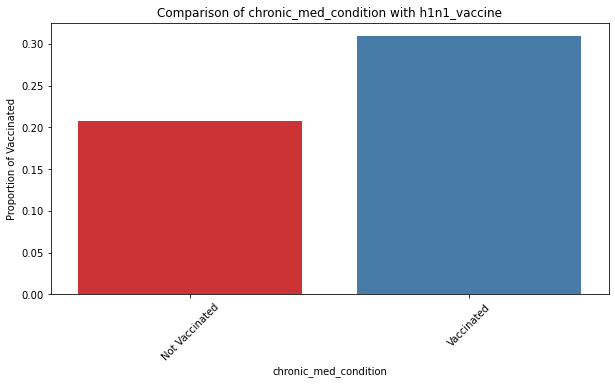

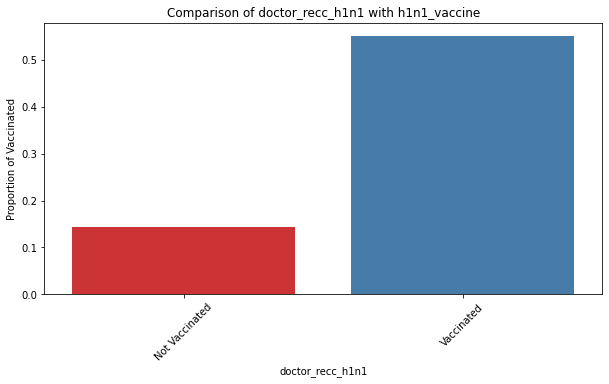

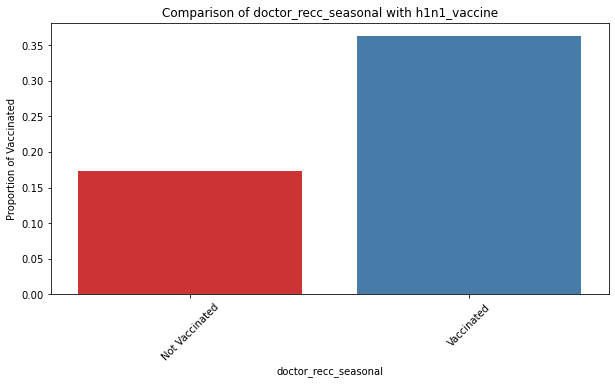

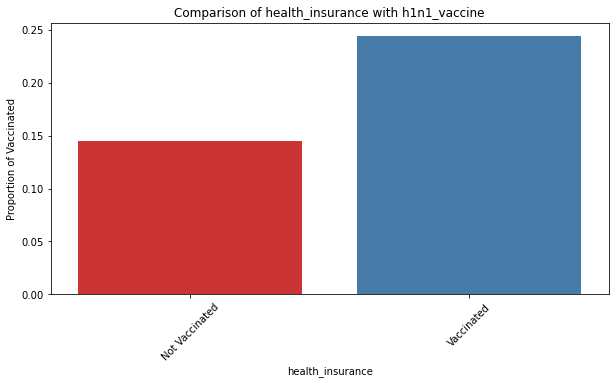

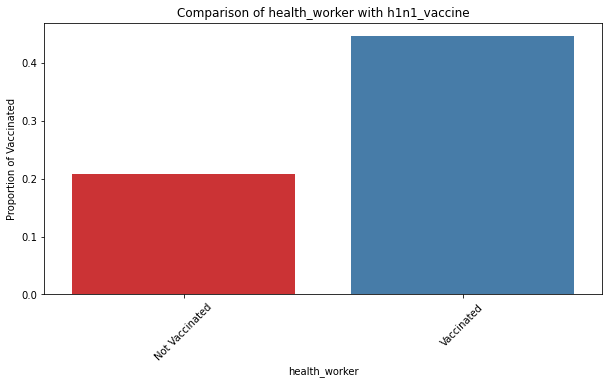

In [71]:
# visualize health related features vs swine flu vaccination
health_cols = ["chronic_med_condition","doctor_recc_h1n1","doctor_recc_seasonal","health_insurance","health_worker"]
function.plot_health_feature_vs_vaccine(vaccines,"h1n1_vaccine",health_cols)

Quite expected that health related features had played a major role in the number of those vaccinated.

Chronic illnesses, Doctors reccomendations, health insurances and whether the respondent was a health worker all positively influenced vaccination.

Let's proceed to do some **multivariate analysis.** 
We want to explore the relationships between multiple features to identify patterns, correlations, and interactions. This can be particularly insightful for understanding the factors influencing vaccine uptake.


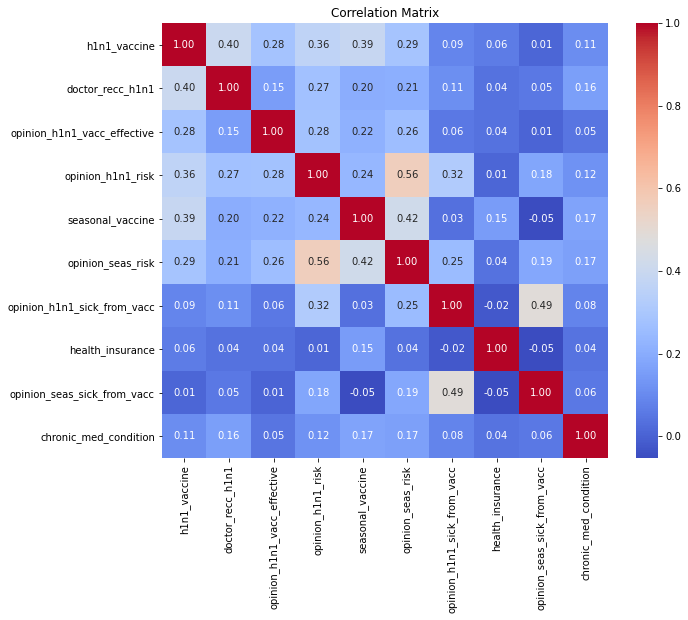

In [72]:
# correlation matrix of various features
corr_cols = ["h1n1_vaccine","doctor_recc_h1n1","opinion_h1n1_vacc_effective","opinion_h1n1_risk","seasonal_vaccine","opinion_seas_risk","opinion_h1n1_sick_from_vacc","health_insurance","opinion_seas_sick_from_vacc","chronic_med_condition"]
function.plot_correlation_matrix(vaccines, corr_cols)

Features that seem to have been more highly correlated with **H1N1 vaccine** were, **doctor's recommendation, respondents opinion on the effectiveness of the swine flu vaccine, respondents opinion on whether the swine flu vaccine was risky, whether they recieved the seasonal flu vaccine as well and thir opinion on the risks associated with the seasonal flu vaccine**.

## DATA MODELLING
***

In this section, I aim to build predictive models to determine the likelihood of H1N1 vaccine uptake based on various health, behavioral, demographic, and opinion features. This will help identify key factors influencing vaccine adoption and guide targeted public health interventions.

First, I'll import the standard machine learning libraries.

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve,ConfusionMatrixDisplay
from sklearn import tree

Based on the results of the exploratory data analysis, I will create a new dataframe that contains those features that will be most useful and relevant to predction analysis.

This new dataframe will contain the **independent features** for my models.

In [74]:
df = vaccines[['doctor_recc_h1n1', 'opinion_h1n1_vacc_effective', 'seasonal_vaccine', 'opinion_seas_vacc_effective','opinion_seas_risk','chronic_med_condition','opinion_h1n1_risk']]

# One-hot encode the data and show the resulting DataFrame with proper column names

ohe = OneHotEncoder()

ohe.fit(df)
X_ohe = ohe.transform(df).toarray()


X = pd.DataFrame(X_ohe, columns=ohe.get_feature_names(df.columns))

X.head()

,doctor_recc_h1n1_0.0,doctor_recc_h1n1_1.0,opinion_h1n1_vacc_effective_1.0,opinion_h1n1_vacc_effective_2.0,opinion_h1n1_vacc_effective_3.0,opinion_h1n1_vacc_effective_4.0,opinion_h1n1_vacc_effective_5.0,seasonal_vaccine_0,seasonal_vaccine_1,opinion_seas_vacc_effective_1.0,...,opinion_seas_risk_3.0,opinion_seas_risk_4.0,opinion_seas_risk_5.0,chronic_med_condition_0.0,chronic_med_condition_1.0,opinion_h1n1_risk_1.0,opinion_h1n1_risk_2.0,opinion_h1n1_risk_3.0,opinion_h1n1_risk_4.0,opinion_h1n1_risk_5.0
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


For my models, I will use **"target_feature"** as my **dependent variable**. This is the h1n1_vaccine feature that explains whether the respondent recieved the swine flu vaccination.

In [75]:
#assigning the target to "y"
y = target_feature

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=45)

**Logistic Regression Baseline Model**

I will use a logistic regression model for my baseline model, from which I will make adjustments to improve subsequent model performances.

In [76]:
# initializing and training the baseline model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

Let's now make some predictions!

In the cell below, 0 means the prediction and the actual value matched, whereas 1 means the prediction and the actual value did not match.

In [77]:
# predict
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

train_residuals = np.abs(y_train - y_hat_train)
print(pd.Series(train_residuals, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals, name="Residuals (proportions)").value_counts(normalize=True))

0    11695
1     2287
Name: Residuals (counts), dtype: int64

0    0.836433
1    0.163567
Name: Residuals (proportions), dtype: float64


*Baseline model evaluation*.

Let's analyze the model's performance.

This output indicates that there are 11,695 instances where the predicted value (y_hat_train) matches the actual value (y_train), resulting in a residual of 0.
There are 2,287 instances where the predicted value differs from the actual value by 1, resulting in a residual of 1.

Approximately **80%** of the predictions were correct (residual of 0).


In [78]:
# display the baseline model performance metrics
print(f"Training data precision = {precision_score(y_train, y_hat_train)}")
print(f"Test data precision = {precision_score(y_test, y_hat_test)}")
print("\n")

print(f"Training data recall = {recall_score(y_train, y_hat_train)}")
print(f"Test data recall = {recall_score(y_test, y_hat_test)}")
print("\n")
                              
print(f"Training data accuracy = {accuracy_score(y_train, y_hat_train)}")
print(f"Test data accuracy = {accuracy_score(y_test, y_hat_test)}")
print("\n")

print(f"Training data F1 score = {f1_score(y_train, y_hat_train)}")
print(f"Test data F1 score = {f1_score(y_test, y_hat_test)}")
print("\n")

Training data precision = 0.7089795918367346
Test data precision = 0.7113594040968343


Training data recall = 0.5246149199637572
Test data recall = 0.538787023977433


Training data accuracy = 0.8364325561436132
Test data accuracy = 0.839145669948273


Training data F1 score = 0.6030203089741365
Test data F1 score = 0.6131621187800963




**Precision:** The model achieves a precision of ~71%, indicating that when the model predicts vaccine uptake, it is correct about 71% of the time.

**Recall:** The recall of ~54% shows that the model identifies just over half of the actual cases of vaccine uptake.

**Accuracy:** The overall accuracy of ~84% suggests good performance but might be inflated due to class imbalance.

**F1-Score:** The F1-score (~61%) balances precision and recall, providing a holistic measure of the model's predictive ability.

AUC: 0.866838924984778


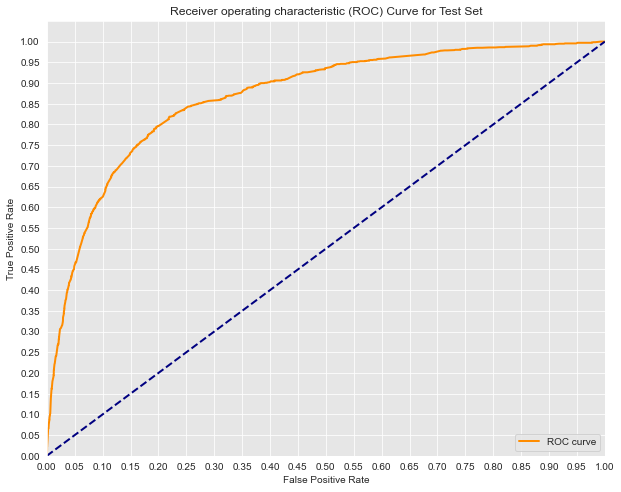

In [79]:
# Probability scores for test set
y_score = logreg.fit(X_train,y_train).decision_function(X_test)

# False positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test,y_score)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC

print('AUC: {}'.format(auc(fpr, tpr)))

# Plot the ROC curve

plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')

plt.show()

The Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) is 0.867, indicating excellent discrimination. This suggests that the model performs well in distinguishing between the two classes (vaccine uptake vs. no vaccine uptake).


Confusion Matrix
----------------


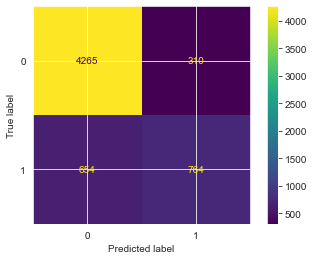

In [80]:
# Create and print a confusion matrix 
conf_matrix = confusion_matrix(y_test, y_hat_test)
print('\nConfusion Matrix')
print('----------------')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot();


**True Negative Rate (Specificity):** The model correctly identifies a high proportion of those who did not take the vaccine.

**True Positive Rate (Sensitivity/Recall):** The recall score aligns with the confusion matrix, showing the model captures 54% of actual vaccine uptake cases.

**Strengths:** High specificity ensures that non-vaccine uptake is accurately predicted. The high AUC score suggests the model is strong at ranking predictions.

**Weaknesses:** Moderate recall indicates that some vaccine uptake cases are missed.


Let's have a look at some of the parameters used by the model so that we can use them to improve future iterations.

In [81]:
# print model parameters
logreg.get_params()

{'C': 1000000000000.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': False,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

**Tuned Logistic Regression model**

To try and improve recall, we can iterate on the baseline model by focusing on hyperparameters that control regularization and class imbalance.

In [82]:
logreg_2 = LogisticRegression(fit_intercept=False,
                              C=0.1,  #stronger regularization
                              solver='liblinear',
                              class_weight="balanced" #address class imbalance
                              )
model_log_2 = logreg_2.fit(X_train, y_train)
model_log_2 

LogisticRegression(C=0.1, class_weight='balanced', fit_intercept=False,
                   solver='liblinear')

In [83]:
# Predict using the second model
y_hat_train_2 = logreg_2.predict(X_train)
y_hat_test_2 = logreg_2.predict(X_test)

# Calculate residuals for the second model
train_residuals_2 = np.abs(y_train - y_hat_train_2)

# Display residual counts and proportions
print(pd.Series(train_residuals_2, name="Residuals (counts)").value_counts())
print()
print(pd.Series(train_residuals_2, name="Residuals (proportions)").value_counts(normalize=True))


0    11092
1     2890
Name: Residuals (counts), dtype: int64

0    0.793306
1    0.206694
Name: Residuals (proportions), dtype: float64


The second model correctly predicts the target outcome nearly 80% of the time.

In [84]:
# Calculate and print performance metrics for the second model
print(f"Training data precision = {precision_score(y_train, y_hat_train_2)}")
print(f"Test data precision = {precision_score(y_test, y_hat_test_2)}")
print("\n")

print(f"Training data recall = {recall_score(y_train, y_hat_train_2)}")
print(f"Test data recall = {recall_score(y_test, y_hat_test_2)}")
print("\n")

print(f"Training data accuracy = {accuracy_score(y_train, y_hat_train_2)}")
print(f"Test data accuracy = {accuracy_score(y_test, y_hat_test_2)}")
print("\n")

print(f"Training data F1 score = {f1_score(y_train, y_hat_train_2)}")
print(f"Test data F1 score = {f1_score(y_test, y_hat_test_2)}")
print("\n")


Training data precision = 0.5443064617975163
Test data precision = 0.5547911547911548


Training data recall = 0.7810329205678043
Test data recall = 0.7961918194640338


Training data accuracy = 0.7933056787297954
Test data accuracy = 0.8006007008176206


Training data F1 score = 0.6415281567849169
Test data F1 score = 0.6539241239501882




The second model shows significant changes in performance compared to the baseline model:

**Precision:**

*Training:* Decreased from 0.7089 to 0.5443.  
*Test:* Decreased from 0.7113 to 0.5548.
*Interpretation:* The model is less precise, meaning a higher proportion of predicted positive cases are incorrect. However, this is acceptable isince the primary goal is to improve recall.

**Recall:**

*Training:* Increased from 0.5246 to 0.7810.                      
*Test:* Increased from 0.5388 to 0.7962.  
*Interpretation:* The model now identifies a much larger proportion of actual positive cases, aligning with the project's focus on recall to minimize missed high-risk individuals.

**Accuracy:**

*Training:* Slightly decreased from 0.8364 to 0.7933.  
*Test:* Slightly decreased from 0.8391 to 0.8006.  
*Interpretation:* Accuracy has dropped slightly, likely due to the trade-off between precision and recall.

**F1 Score:**

*Training:* Increased from 0.6030 to 0.6415.
*Test:* Increased from 0.6132 to 0.6539.  
*Interpretation:* The F1 score has improved, reflecting a better balance between precision and recall.

AUC: 0.8669217014651591


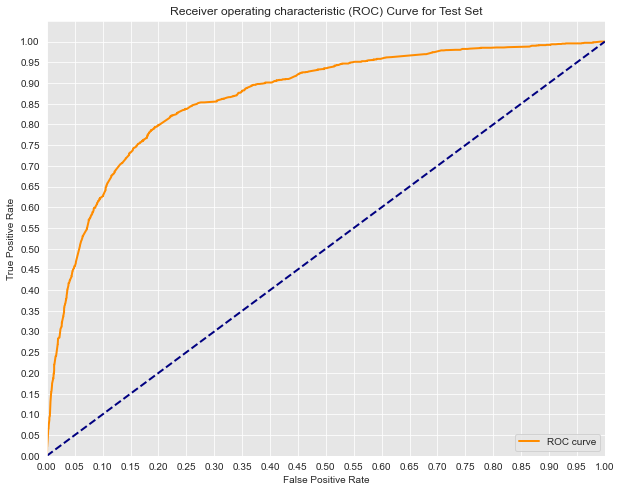

In [85]:
# Probability scores for test set
y_score_2 = logreg_2.decision_function(X_test)

# False positive rate and true positive rate
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_2)

# Seaborn's beautiful styling
sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

# Print AUC
print('AUC: {}'.format(auc(fpr_2, tpr_2)))

# Plot the ROC curve
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr_2, tpr_2, color='darkorange', lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve for Test Set')
plt.legend(loc='lower right')

plt.show()


The new AUC of 0.8669 suggests that the adjustments made of stronger regularization and balanced classes have not negatively impacted the model's overall performance in terms of its ability to distinguish between classes.


Confusion Matrix for Second Model
----------------------------------
[[3669  906]
 [ 289 1129]]


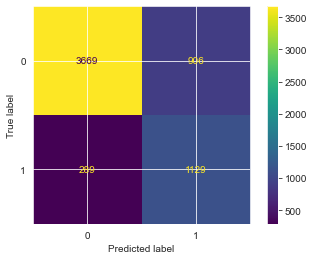

In [86]:
# Create and print a confusion matrix for the second model
y_hat_test_2 = model_log_2.predict(X_test)
conf_matrix_2 = confusion_matrix(y_test, y_hat_test_2)
print('\nConfusion Matrix for Second Model')
print('----------------------------------')
print(conf_matrix_2)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_2)
disp_2.plot();


 The model has improved its recall (detecting more true positives) compared to the baseline model, indicating better performance in capturing individuals who actually took the vaccine.

**Decision Tree Classifier**

Let's try to explore with another kind of machine learning classifier. Decision trees!

So we can finally compare the performance of different models.

In [87]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

# predictions
y_hat_test_tree = clf.predict(X_test)
y_hat_train_tree = clf.predict(X_train)

print('Accuracy: ', accuracy_score(y_test, y_hat_test_tree))

Accuracy:  0.8269647922576339


This indicates that the decision tree classifier model correctly predicted the outcome for 82.71% of the test cases.

Some more of it's performance metrics.


AUC is :0.82

Confusion Matrix
----------------


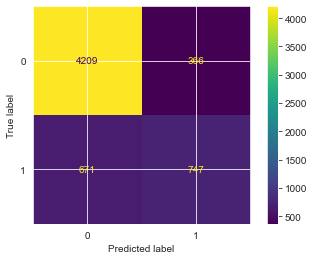

In [88]:
# Check the AUC for predictions using y_proba
y_proba = clf.predict_proba(X_test)[:, 1]

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_proba)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
conf_matrix = confusion_matrix(y_test, y_hat_test_tree)
print('\nConfusion Matrix')
print('----------------')
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot();


**AUC** shows the model's ability to distinguish between positive and negative classes, with 0.82 indicating a good level of discrimination.

In [89]:
# Metrics
print(f"Training data precision = {precision_score(y_train, y_hat_train_tree)}")
print(f"Test data precision = {precision_score(y_test, y_hat_test_tree)}\n")

print(f"Training data recall = {recall_score(y_train, y_hat_train_tree)}")
print(f"Test data recall = {recall_score(y_test, y_hat_test_tree)}\n")

print(f"Training data accuracy = {accuracy_score(y_train, y_hat_train_tree)}")
print(f"Test data accuracy = {accuracy_score(y_test, y_hat_test_tree)}\n")

print(f"Training data F1 score = {f1_score(y_train, y_hat_train_tree)}")
print(f"Test data F1 score = {f1_score(y_test, y_hat_test_tree)}\n")

Training data precision = 0.7558049535603715
Test data precision = 0.6711590296495957

Training data recall = 0.5898520084566596
Test data recall = 0.5267983074753173

Training data accuracy = 0.8577456730081533
Test data accuracy = 0.8269647922576339

Training data F1 score = 0.6625954198473283
Test data F1 score = 0.5902805215329909



The decision tree classifier performs better on the training set than it does on the test data(unseen) in all metrics meaning it might be suffering from overfitting.

**Tuned Decision Tree Classifier**

Let's improve the Decision Tree by tuning hyperparameters to balance overfitting and underfitting.

In [90]:
# Create and configure the improved classifier with tuned hyperparameters
clf_4 = DecisionTreeClassifier(
    class_weight='balanced',   # address class imbalance
    criterion='entropy',       # entropy for information gain
    max_depth=20,              # limit the tree depth to reduce overfitting
    min_samples_split=10,      # minimum samples required to split a node
    min_samples_leaf=5,        # minimum samples required at a leaf node
    random_state=42            # reproducibility
)

# Fit the model on the training data
clf_4.fit(X_train, y_train)

# Predictions for training and test data
y_hat_train_tree_4 = clf_4.predict(X_train)
y_hat_test_tree_4 = clf_4.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, y_hat_test_tree_4))

Accuracy:  0.7829133989654598


The accuracy of the second decision tree classifier has decreased to 78%.


AUC is :0.84

Confusion Matrix
----------------
[[3593  982]
 [ 319 1099]]


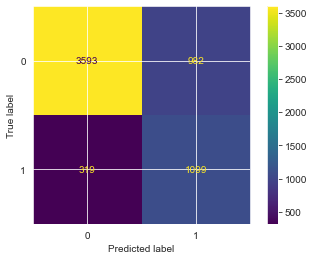

In [91]:
# Check the AUC for predictions using y_proba
y_proba_4 = clf_4.predict_proba(X_test)[:, 1]

# Calculate AUC
roc_auc_4 = roc_auc_score(y_test, y_proba_4)
print('\nAUC is :{0}'.format(round(roc_auc_4, 2)))

# Create and print a confusion matrix 
conf_matrix_4 = confusion_matrix(y_test, y_hat_test_tree_4)
print('\nConfusion Matrix')
print('----------------')
disp_4th = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_4)
disp_4th.plot();
print(conf_matrix_4)


AUC improved compared to the original decision tree indicating better discrimination between classes.

Looking at the true positives and false negatives, the classifier also correctly identifies more people likely to take the vaccine, balancing precision and recall.

In [ ]:
# Metrics for the 4th iteration of the decision tree
print(f"Training data precision = {precision_score(y_train, y_hat_train_tree_4)}")
print(f"Test data precision = {precision_score(y_test, y_hat_test_tree_4)}\n")

print(f"Training data recall = {recall_score(y_train, y_hat_train_tree_4)}")
print(f"Test data recall = {recall_score(y_test, y_hat_test_tree_4)}\n")

print(f"Training data accuracy = {accuracy_score(y_train, y_hat_train_tree_4)}")
print(f"Test data accuracy = {accuracy_score(y_test, y_hat_test_tree_4)}\n")

print(f"Training data F1 score = {f1_score(y_train, y_hat_train_tree_4)}")
print(f"Test data F1 score = {f1_score(y_test, y_hat_test_tree_4)}\n")


Training data precision = 0.5608794855839038
Test data precision = 0.5281114848630466

Training data recall = 0.8166717003926306
Test data recall = 0.7750352609308886

Training data accuracy = 0.8051780861107137
Test data accuracy = 0.7829133989654598

Training data F1 score = 0.6650270536153468
Test data F1 score = 0.6281794798513861



**Recall:**

Significant Increase: The recall for the tuned model (0.7750 on the test set) is much higher compared to the original model (0.5282).

**Precision:**

Slight Decrease: The test precision for the tuned model (0.5281) is lower than the original (0.6711). This trade-off is expected when prioritizing recall.

**F1 Score:**

Improved: The F1 score of the tuned model (0.6282) is higher than that of the original model (0.5912). A better balance between precision and recall.

**Accuracy:**

Slight Drop: The accuracy of the tuned model (0.7829) is lower than the original model (0.8271)

**AUC:**

Improved: The AUC for the tuned model (0.84) is slightly higher than the original (0.82), indicating that the overall discriminatory power


## EVALUATION
***

For a project aimed at **guiding public health efforts and increasing vaccine uptake**, the most important performance metrics should focus on the model's ability to identify individuals likely to vaccinate or resist vaccination, while minimizing misclassification that could misguide outreach strategies.

Hence, **recall** the ability of the model to correctly identify individuals who are likely to vaccinate, and **AUC** the model's ability to distinguish between vaccinated and non-vaccinated individuals across different thresholds and **precision** which measures the proportion of predicted vaccinated individuals who are actually vaccinatedthe most important metrics of success.



**Tuned Logistic Regression Model vs Tuned Decision Trees Classifier**

**Recall:**

The tuned logistic regression model has a slightly higher recall (0.796) compared to the tuned decision tree model (0.775). This indicates that it is better at identifying all actual positive cases.

**AUC:**

The tuned logistic regression model has an AUC of 0.867, which is higher than the decision tree's AUC of 0.84. Thissuggests that it is better at distinguishing between positive and negative classes, making it more effective for decision-making.

**Precision:**

The tuned logistic regression model has a higher test precision (0.555) than the tuned decision tree model (0.528). This means it is more accurate when predicting positive cases.



## CONCLUSIONS
***
**Exploratory Data Analysis:**

EDA revealed key trends and relationships between the features and the target variable, which allowed for targeted feature engineering and preprocessing.
Variables such as doctor_recc_h1n1, opinion_h1n1_vacc_effective, seasonal_vaccine, and chronic_med_condition were identified as significant predictors for the likelihood of individuals receiving the H1N1 vaccine.

**Modelling Results:**

Multiple models were evaluated to find the best fit for predicting the likelihood of H1N1 vaccine uptake.

The tuned logistic regression model emerged as the most effective model, making it suitable for real-world deployment where understanding both positive and negative cases is crucial.
Decision Tree Classifier:
The decision tree model, despite being optimized, had lower performance metrics.


## RECOMMENDATIONS
***
**Model Selection:**

Choose the tuned logistic regression model as the final model for implementation due to its superior performance metrics. It ensures robust prediction performance and is highly interpretable, which is vital for public health applications where stakeholders need to understand model outcomes.

**Public Health Strategy:**

Use the insights from the model to tailor public health campaigns and interventions, focusing efforts on communities and demographics identified as being at higher risk of not receiving the vaccine.

Employ targeted messaging that aligns with the opinions and perceptions about vaccine effectiveness.

Enhance Public Health Campaigns focused on Doctor Recommendations. The EDA highlighted that variables such as **doctor_recc_h1n1** were significant predictors of vaccine uptake. Public health officials should leverage this insight to launch campaigns that encourage healthcare providers to actively recommend the H1N1 vaccine to patients. 


## NEXT STEPS
***

Collect more data or improve data quality to enhance model performance, particularly for features that showed lower impact during analysis.

Monitor model performance over time to adapt to changes in public behavior or new health information, ensuring long lasting effectiveness.